# Generating Synthetic Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
n_samples = 1000  # Number of normal data points
n_anomalies = 50  # Number of anomalous data points
n_features = 2    # Number of features

In [ ]:
# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# Generate anomalous data
anomalous_data = np.random.uniform(low=-6, high=6, size=(n_anomalies, n_features))

# Combine the data
data = np.vstack((normal_data, anomalous_data))

# Create labels (0 for normal, 1 for anomaly)
labels = np.hstack((np.zeros(n_samples), np.ones(n_anomalies)))

# Shuffle the data and labels together
shuffled_indices = np.random.permutation(len(labels))
data = data[shuffled_indices]
labels = labels[shuffled_indices]

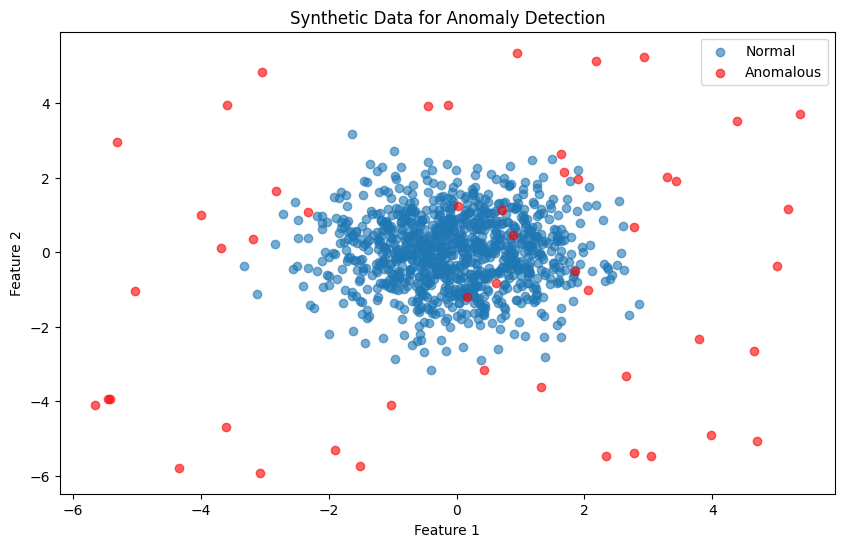

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], label='Normal', alpha=0.6)
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], label='Anomalous', alpha=0.6, color='red')
plt.title('Synthetic Data for Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Implementing Autoencoders for Anomaly Detection


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)

In [ ]:
autoencoder = Sequential([
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu',
          activity_regularizer=regularizers.l1(10e-5)),
    Dense(hidden_dim, activation='relu'),
    Dense(encoding_dim, activation='relu'),
    Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = autoencoder.fit(X_train[y_train == 0], X_train[y_train == 0],
                          epochs=50, batch_size=32,
                          validation_data=(X_test, X_test),
                          verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 20ms/step - loss: 0.6597 - val_loss: 0.8338
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.7561
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5058 - val_loss: 0.6829
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4376 - val_loss: 0.6051
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3718 - val_loss: 0.5163
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2960 - val_loss: 0.4081
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2068 - val_loss: 0.2934
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1274 - val_loss: 0.2054
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0782 - val_loss: 0.1487
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.1116
Epoch 11/50
25/25 

In [ ]:
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [ ]:
train_mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
test_mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

In [ ]:
threshold = np.percentile(train_mse, 95)
print(f"Reconstruction error threshold: {threshold}")

Reconstruction error threshold: 0.0037394145551769746


In [ ]:
anomalies = test_mse > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 11


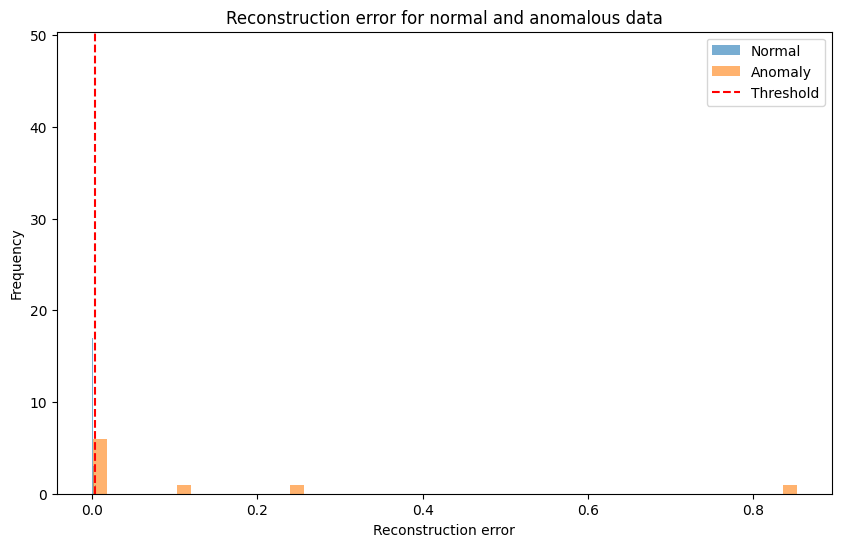

In [ ]:
# Visualize the reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(test_mse[y_test == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(test_mse[y_test == 1], bins=50, alpha=0.6, label='Anomaly')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction error for normal and anomalous data')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

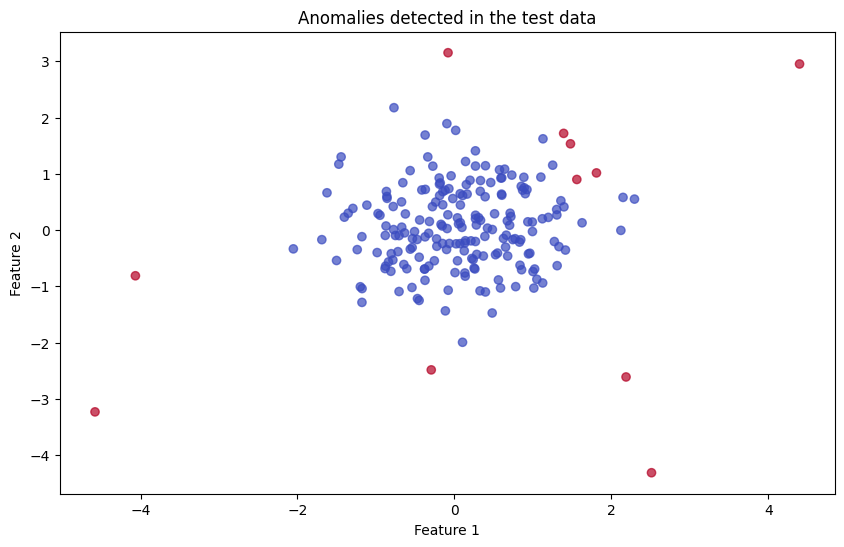

In [ ]:
# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=anomalies, cmap='coolwarm', alpha=0.7)
plt.title('Anomalies detected in the test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

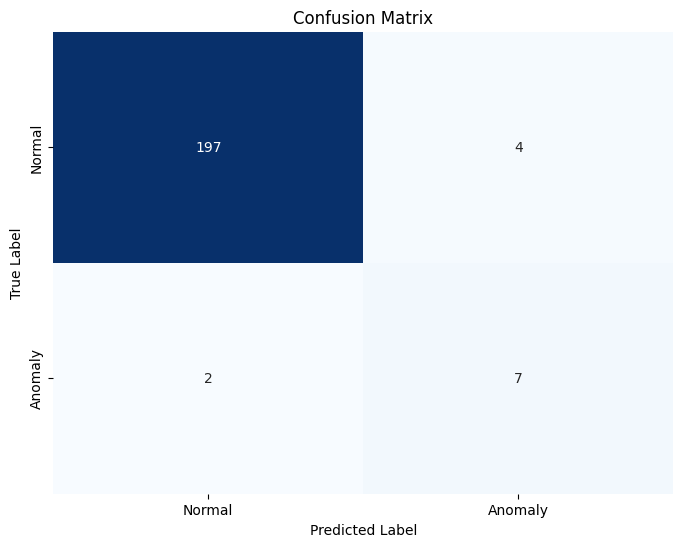

In [ ]:
# Convert boolean anomaly detection results to binary labels (0: normal, 1: anomaly)
y_pred_binary = anomalies.astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()